# Task 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import random
from pympler import asizeof

We chose two algorithms from the section ***"VII Selected Topics"***, subsection ***"String Matching"***. The chosen algorithms are called **"The Knuth-Morris-Pratt algorithm"** and **"The Rabin-Karp algorithm"**. *(PAGE 985)*

## The Knuth-Morris-Pratt Algorithm

We compute the prefix function.

In [2]:
#PREFIX FUNCTION
def prefix_function(pattern):
    
    len_pattern = len(pattern)
    prefix = [0]*len_pattern
    i = 0
    j = 1
    
    while j < len_pattern:
        if pattern[i] == pattern[j]:
            prefix[j] = i + 1
            i += 1
            j += 1
        
        elif i:
            i = prefix[i - 1]
        
        else:
            prefix[j] = 0
            j += 1
            
    return prefix

In [3]:
def KMP(text, pattern):
    
    len_pattern = len(pattern)
    len_text = len(text)
    prefix = prefix_function(pattern)
    index_list = []
    iterations = 0
    i = 0
    j = 0
    
    while i < len_text and j < len_pattern:
        iterations += 1
        if text[i] == pattern[j]:
            if j == len_pattern - 1:
                index_list.append(i - len_pattern + 1)
                j = 0
            
            else:
                j += 1
            
            i += 1
        elif j:
            j = prefix[j-1]
        
        else:
            i += 1
            
    return index_list, iterations

https://www.youtube.com/watch?v=5i7oKodCRJo

## The Rabin-Karp Algorithm

In [4]:
def RBK(text, pattern, q): #q is any prime number
    
    len_pattern = len(pattern)
    len_text = len(text)
    d = 256 #Number of characters in the ASCII table.
    p = 0
    t = 0
    h = 1
    i = 0
    j = 0
    iterations = 0
    index_list = []
    
    for i in range(len_pattern-1):
        h = (h*d) % q
    
    for i in range(len_pattern):
        p = (d*p + ord(pattern[i])) % q
        t = (d*t + ord(text[i])) % q
    
    for i in range(len_text-len_pattern+1):
        iterations += 1
        
        if p == t:
            for j in range(len_pattern):
                if text[i+j] != pattern[j]:
                    break
            
            j += 1
            if j == len_pattern:
                index_list.append(i)
        
        if i < len_text-len_pattern:
            t = (d*(t - ord(text[i])*h) + ord(text[i+len_pattern])) % q
            
            if t < 0:
                t = t + q
                
    return index_list, iterations

https://www.youtube.com/watch?v=oxd_Z1osgCk

## ANALYSIS

In [5]:
df = pd.DataFrame()
pattern='ab'
letters='abracadabra'
columna = 0

#######################################

for i in range(10,25000,5):
    
    #we randomly move the letters of the word.
    text = ''.join(random.choice(letters) for j in range(i))
    
##################KMP##################

    #Time
    df.loc[columna, 'KMP_Time'] = timeit.timeit('KMP(text, pattern)',setup='from __main__ import KMP, prefix_function, pattern, text',number=2)
    
    #MEMORY
    df.loc[columna, 'KMP_Memory'] = asizeof.asizeof(KMP(text, pattern))
    
    #ITERATIONS
    _, df.loc[columna, 'KMP_Iterations'] = KMP(text, pattern)
    
##################RBK##################

    #TIME 
    df.loc[columna, 'RBK_Time'] = timeit.timeit('RBK(text, pattern, 131)',setup='from __main__ import RBK, pattern, text',number=2)
    
    #MEMORY
    df.loc[columna, 'RBK_Memory'] = asizeof.asizeof(RBK(text, pattern, 131))
    
    #ITERATIONS
    _,df.loc[columna, 'RBK_Iterations'] = RBK(text, pattern, 131)
    
#######################################

    columna = columna + 1

In [6]:
df.tail()

,KMP_Time,KMP_Memory,KMP_Iterations,RBK_Time,RBK_Memory,RBK_Iterations
4993,0.019627,83408.0,34258.0,0.022544,83408.0,24974.0
4994,0.023586,80272.0,34188.0,0.030356,80272.0,24979.0
4995,0.038441,85616.0,34252.0,0.027461,85616.0,24984.0
4996,0.013653,84720.0,34186.0,0.022162,84720.0,24989.0
4997,0.021464,84272.0,34389.0,0.029029,84272.0,24994.0


### GRAPHS

In [7]:
def plot(d1, d2, ylabel,label):
    
    plt.figure(figsize=(15, 6))
    plt.plot(d1, c='RED',label='Knuth-Morris-Pratt Algorithm', linewidth=1)
    plt.plot(d2, c='Green', label='Rabin-Karp Algorithm', linewidth=1)
    plt.legend()
    plt.title(label)
    plt.xlabel('N')
    plt.ylabel(ylabel)
    plt.show()

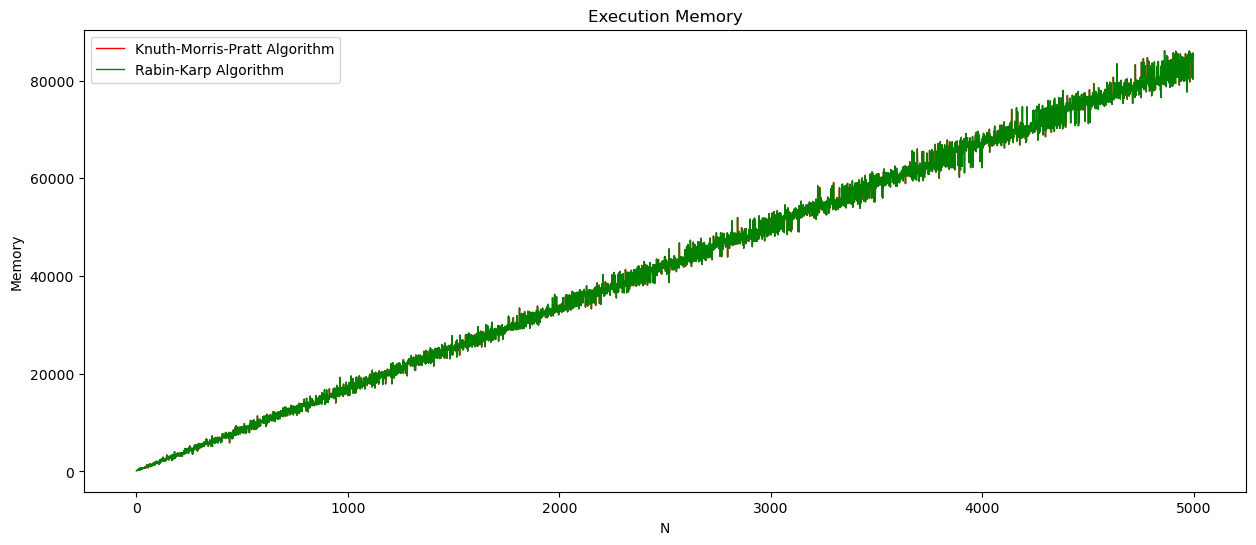

In [8]:
plot(df['KMP_Memory'], df['RBK_Memory'],'Memory','Execution Memory')

We can see that both algorithms occupy the same memory space.

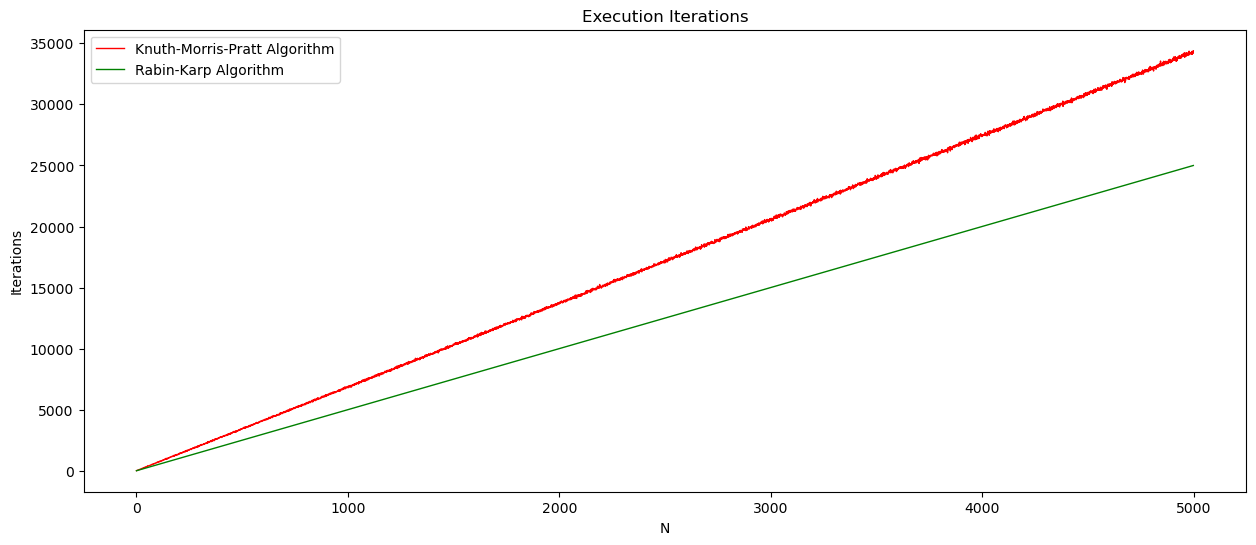

In [9]:
plot(df['KMP_Iterations'], df['RBK_Iterations'],'Iterations', 'Execution Iterations')

**The Knuth-Morris-Pratt algorithm** performs more iterations than the **Rabin-Karp Algorithm**.

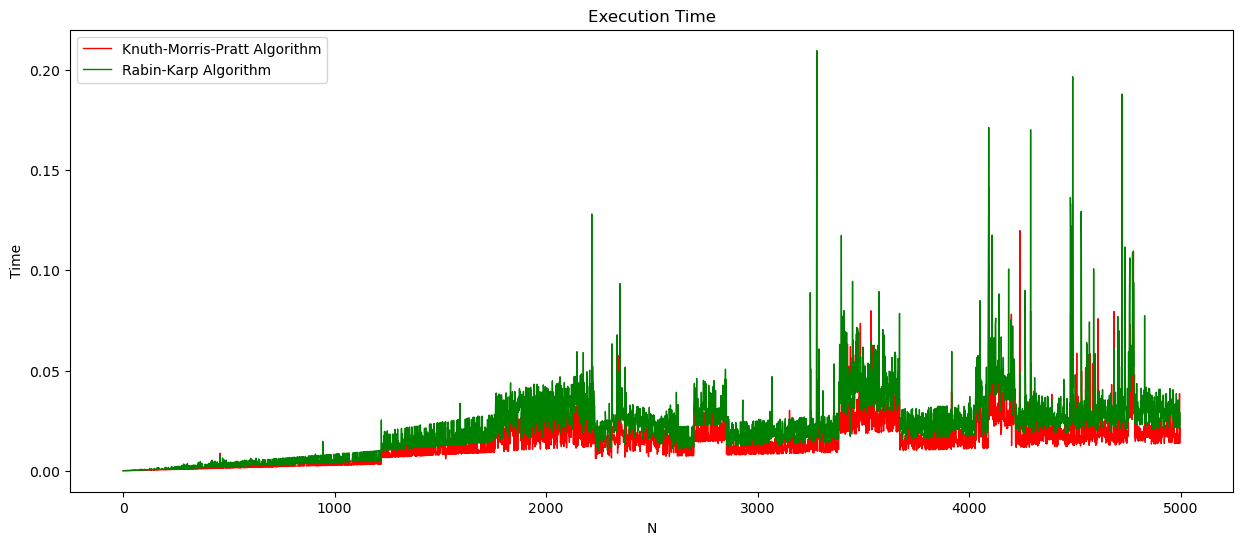

In [10]:
plot(df['KMP_Time'], df['RBK_Time'], 'Time','Execution Time')

**The Rabin-Karp algorithm** takes longer to run than the **Knuth-Morris-Pratt algorithm**.